<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/DSBA_M2_W2_NLP_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweet-preprocessor -qq

In [ ]:
import pandas as pd
import preprocessor as prepro
import spacy
import seaborn as sns
sns.set()

In [ ]:
data_congress = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/master/M2/data/pol_tweets.gz')

In [ ]:
data_congress

,text,labels
340675,RT @GreenBeretFound Today we remember Sgt. 1st...,0
289492,"Yes, yes, yes, yes and yes. 😷 #JerseyStrong 💪🏾...",1
371088,Made new friends this afternoon delivering mas...,1
82212,RT @TXMilitary Happening TODAY: Pilots with th...,0
476047,RT @SteveScalise President Trump's legal team ...,0
...,...,...
61499,Outrageous.\n\nBrave health care workers are p...,0
185562,RT @dskolnick .@RepTimRyan proposes up to $3K ...,1
354040,It is clear that the #HeroesAct will help tens...,1
708686,Democrats are talking about Bolton and Mulvane...,0


In [ ]:
# prepro settings
prepro.set_options(prepro.OPT.URL, prepro.OPT.EMOJI, prepro.OPT.NUMBER, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.SMILEY)

In [ ]:
data_congress['text_clean'] = data_congress['text'].map(lambda t: prepro.clean(t))

In [ ]:
data_congress['text_clean'] = data_congress['text_clean'].str.replace('#','')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

X = vectorizer.fit_transform(data_congress['text_clean'])

In [ ]:
y = data_congress['labels']

In [ ]:
def tweet_preprocess(tweets):
  prepro_tweets = tweets.map(lambda t: prepro.clean(t))
  prepro_tweets = prepro_tweets.str.replace('#','')
  prepro_tweets = vectorizer.transform(prepro_tweets)

  return prepro_tweets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # since we have 3 classes
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(X_test, y_test)

0.7484

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2117, 1643],
       [ 873, 5367]])

In [ ]:
len(y_pred)

10000

In [ ]:
data_tweets = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/master/M2/data/pres_debate_2020.gz')

In [ ]:
data_tweets

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,reply_to,translate,trans_src,trans_dest
0,1318944772183281664,1318944772183281664,2020-10-21 15:58:33,2020-10-21 15:58:33,0,,Still time to register: Students can join the ...,en,[presidentialdebate2020],[],1130857348921036802,1130857348921036800,UVADemocracy,UVA Democracy Initiative,3,15,https://twitter.com/UVADemocracy/status/131894...,[https://bit.ly/349NTIU],[https://pbs.twimg.com/media/Ek3UXC1X0AAw47D.png],1,https://pbs.twimg.com/media/Ek3UXC1X0AAw47D.png,2,0,2,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
1,1318938583122743296,1318938583122743296,2020-10-21 15:33:57,2020-10-21 15:33:57,0,,Be prepared for Trump to railroad Thursday’s d...,en,[presidentialdebate2020],[],243363569,243363569,kevinjguest,Kevin Guest,3,15,https://twitter.com/kevinjguest/status/1318938...,[],[],0,,0,0,0,https://twitter.com/donaldjtrumpjr/status/1318...,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
2,1318932554897031168,1318932554897031168,2020-10-21 15:10:00,2020-10-21 15:10:00,0,,Join us tomorrow from 5-8pm as @michaelpleahy ...,en,[presidentialdebate2020],[],26819436,26819436,TalkradioWLAC,Talkradio WLAC,3,15,https://twitter.com/TalkradioWLAC/status/13189...,[https://wlac.iheart.com/calendar/event/5f8df3...,[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
3,1318928783169245184,1318928783169245184,2020-10-21 14:55:01,2020-10-21 14:55:01,0,,Wanna bet #ProudBoys comes up #PresidentialDeb...,en,"[proudboys, presidentialdebate2020]",[],298018860,298018860,PBPoliticsFins,Antonio Fins,3,14,https://twitter.com/PBPoliticsFins/status/1318...,[https://www.palmbeachpost.com/story/news/2020...,[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
4,1318927150247018496,1318927150247018496,2020-10-21 14:48:31,2020-10-21 14:48:31,0,,RT College Tour @BelmontUniv was spotless. Gor...,en,"[musiccity, presidentialdebate2020]",[],4159192877,4159192877,12thSouth,12th South,3,14,https://twitter.com/12thSouth/status/131892715...,[],[https://pbs.twimg.com/media/Ek3CBOhXYAIpo8C.j...,1,https://pbs.twimg.com/media/Ek3CBOhXYAIpo8C.jpg,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,1311705601597222912,1311705601597222912,2020-10-01 16:32:40,2020-10-01 16:32:40,0,,Check out my Gig on Fiverr: do email marketing...,en,"[october1st, worsttrumpever, thursdaythoughts,...",[],1294253523769667586,1294253523769667584,kvngmujebo,Kvngmujebo,4,16,https://twitter.com/kvngmujebo/status/13117056...,[https://www.fiverr.com/share/1KRDaK],[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
8807,1311705488531156992,1311705488531156992,2020-10-01 16:32:13,2020-10-01 16:32:13,0,,This was made in 2012! It’s exactly like what ...,en,"[democrats, republicans, presidentialdebate202...",[],25635056,25635056,AZLatina480,Jessica Williams,4,16,https://twitter.com/AZLatina480/status/1311705...,[],[],0,,0,0,0,https://twitter.com/JonnyEthco/status/13113395...,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
8808,1311705196657958912,1311705196657958912,2020-10-01 16:31:03,2020-10-01 16:31:03,0,,How you finna lose two swing states with one q...,en,[presidentialdebate2020],[],382541164,382541164,SampsonRaySimon,Sampson Ray Simon,4,16,https://twitter.com/SampsonRaySimon/status/131...,[],[],0,,0,0,0,,PresidentialDebate2020,,,,"{'user_id': None, 'username': None}",,,
8809,1311704929090891776,1311704929090891776,2020-10-01 16:30:00,2020-10-01 16:30:00,0,,"This morning on the @ArleneBynonShow, @gmacofg...",en,"[erinotoole, blanchet, houseofcommons, trudeau...",[],1343036322,1343036322,SXMC

In [ ]:
X_new = tweet_preprocess(data_tweets['tweet'])

In [ ]:
data_tweets['prediction'] = model.predict(X_new)

In [ ]:
data_tweets['prediction']

0       1
1       1
2       1
3       0
4       1
       ..
8806    0
8807    0
8808    1
8809    1
8810    0
Name: prediction, Length: 8811, dtype: int64

In [ ]:
model.predict_proba(X_new)

array([[0.14135904, 0.85864096],
       [0.40872923, 0.59127077],
       [0.28459488, 0.71540512],
       ...,
       [0.45947663, 0.54052337],
       [0.4525652 , 0.5474348 ],
       [0.63586723, 0.36413277]])

In [ ]:
data_tweets['dem_prob'] = model.predict_proba(X_new)[:, 1]

In [ ]:
data_tweets.sort_values('dem_prob', ascending=True)['tweet'][:20]

5234    China for Biden  #PresidentialDebate2020 #Deba...
1754    #HillaryClinton #china #Communism #Shame on yo...
4779    #NextTopic China 🇨🇳  Susan: "@VP how would you...
1712    EXC: Debate Commission Member Tied To Transiti...
2114    #PresidentialDebate2020 elections have been in...
2443    #PresidentialDebate2020 elections have been in...
1896    BRUTAL: Resurfaced Video of Joe Biden Should D...
1144    @CBSNews #PresidentialDebate2020 RIGGED SYSTEM...
8651    @debates doesn't believe in free speech &amp; ...
6201    @realDonaldTrump @MarkMeadows @senatemajldr @k...
4096    Freedom of speech in Chinese style🤷🏻‍♀️ #Presi...
2312    China country is way more healthier then the U...
2142    @JRehling OVERWEIGHT and UNATTRACTIVE 😂🤣😂🤣😂🤣😂🤣...
2725    #PresidentialDebate2020 #thursdaymorning #MAGA...
7280    Senate found Hunter Biden got $3.5 from Moscow...
1378    @thebradfordfile @JoeBiden @KamalaHarris @DNC ...
164     Who masterminded #political #economy of #Covid...
8728    SHUT U

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


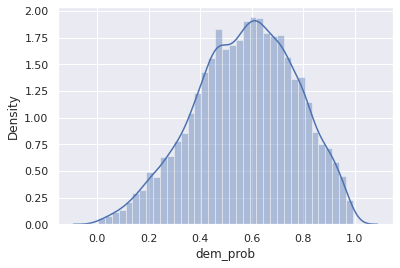

In [ ]:
sns.distplot(data_tweets['dem_prob'])

In [ ]:
!pip -q install eli5

     |████████████████████████████████| 106 kB 8.4 MB/s 


In [ ]:
import eli5
eli5.show_weights(model[''], feature_names=vectorizer.get_feature_names(), target_names=['rep','dem'], top=20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
eli5.show_prediction(model, data_tweets['tweet'][5235], vec=vectorizer, target_names=['rep','dem'])

In [ ]:
data_tweets['tweet'][5234]

'China for Biden  #PresidentialDebate2020 #Debates2020 #biden2020 #Trump2020 #VPDebate'